# Growth and decay of Maryland counties since 2010

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

raw_data = pd.read_csv("MD_10_16.csv")
raw_data.replace('Baltimore city', 'Baltimore City', inplace=True)

### We want only the year over year data at a county level, not at the town levels. So let's get rid of all of the superfluous data. That means we want the following data
* CTYNAME: county name
* YEAR == 3-9: So that we can measure the difference (Note: This is not in terms of years, but of 1 -9, so we will need to clean that later. 1 and 2 are census totals taken in april of 2010, while 3-9 are estimates taken in July from 1010 on. We will only use the later for consistency)
* AGEGRP == 0: THis is the all encompassing age group.
* TOT_POP: Totall population
* TOT_MALE: Total male population
* TOT_FEMALE: Total female population

In [56]:
df = raw_data[['CTYNAME', 'YEAR', 'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE']].copy()  #Make broad data slices

#Remove unnecessary age groups, leaving only total populations of counties

df = df[df['AGEGRP'] == 0] 

#Remove superfluous census data, leave only July estimates
df = df[df['YEAR'] > 2] 

#Convert YEAR to the actual year, not just an iterator
df['YEAR']+= 2007

#Get rid of the entire age group column to reduce clutter
df.drop('AGEGRP', axis = 1, inplace = True) 


first_year = np.max(df['YEAR'])
last_year = np.min(df['YEAR'])
#The index is based on all of the original rows, of which we removed 95%. Let's reset the index to the county and year

df.reset_index(inplace = True)

In [57]:
arr = np.where((df['YEAR'] == 2010).reshape(-1, 1), 0, df[['TOT_POP', 'TOT_MALE', 'TOT_FEMALE']].pct_change())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [58]:
dummy = 100 * pd.DataFrame(data = arr.reshape(-1, 3), columns = ['PCT_POP', 'PCT_MEN', 'PCT_FEMALE'])

In [59]:
dummy = 100 * pd.DataFrame(data = arr.reshape(-1, 3), columns = ['PCT_POP', 'PCT_MEN', 'PCT_FEMALE'])

df = pd.concat([df, dummy], axis = 1, join = 'inner')

df['PCT_CHNG'] = df.groupby(['CTYNAME'])['PCT_POP'].apply(lambda x: ((x/100 + 1).cumprod() - 1) * 100)

In [60]:
df['PCT_CHNG'] = df.groupby(['CTYNAME'])['PCT_POP'].apply(lambda x: ((x/100 + 1).cumprod() - 1) * 100)

In [61]:
df['PCT_CHNG'] = df.groupby(by = 'CTYNAME')['PCT_POP'].apply(lambda x: ((x/100 + 1).cumprod() - 1) * 100)

In [62]:
df

,index,CTYNAME,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,PCT_POP,PCT_MEN,PCT_FEMALE,PCT_CHNG
0,38,Allegany County,2010,75021,38791,36230,0.000000,0.000000,0.000000,0.000000
1,57,Allegany County,2011,74586,38706,35880,-0.579838,-0.219123,-0.966050,-0.579838
2,76,Allegany County,2012,73975,38388,35587,-0.819189,-0.821578,-0.816611,-1.394276
3,95,Allegany County,2013,73618,38190,35428,-0.482595,-0.515786,-0.446792,-1.870143
4,114,Allegany County,2014,73045,37919,35126,-0.778342,-0.709610,-0.852433,-2.633929
5,133,Allegany County,2015,72531,37650,34881,-0.703676,-0.709407,-0.697489,-3.319071
6,152,Allegany County,2016,72130,37565,34565,-0.552867,-0.225764,-0.905937,-3.853588
7,209,Anne Arundel County,2010,539310,266685,272625,0.000000,0.000000,0.000000,0.000000
8,228,Anne Arundel County,2011,545017,269435,275582,1.058204,1.031179,1.084640,1.058204
9,247,Anne Arundel County,2012,550641,272423,278218,1.031894,1.108987,0.956521,2.101018


In [63]:
ranked = df[df['YEAR']== last_year].copy()
ranked.sort_values('TOT_POP', ascending = False, inplace = True)
ranked.reset_index(inplace = True)
ranked = ranked['CTYNAME']

In [64]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [72]:
df.pivot('YEAR', 'CTYNAME', 'PCT_CHNG')[ranked[:5]]

CTYNAME,Montgomery County,Prince George's County,Baltimore County,Baltimore City,Anne Arundel County
YEAR,,,,,
2010,0.000000,0.000000,0.000000,0.000000,0.000000
2011,1.700977,1.058186,0.859296,-0.061172,1.058204
2012,3.062210,1.922337,1.493474,0.245817,2.101018
2013,4.244301,2.942987,2.115248,0.267710,3.075597
2014,5.270705,4.022309,2.515005,0.347395,3.830079
2015,6.136506,4.640913,2.848776,0.033323,4.547848
2016,6.918012,4.877221,3.074143,-1.051361,5.383916


([<matplotlib.axis.YTick at 0x34eb555cf8>,
 <a list of 8 Text yticklabel objects>)

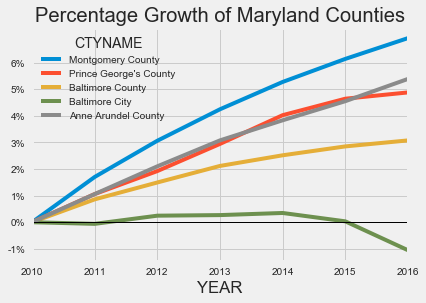

In [73]:
graph = df.pivot('YEAR', 'CTYNAME', 'PCT_CHNG')[ranked[:5]].plot()
graph.axhline(y = 0, color = 'black', linewidth = 1, alpha = 1)
plt.title('Percentage Growth of Maryland Counties')
plt.yticks(np.arange(-1,7), (x + '%' for x in (np.arange(-1,7).astype('str'))))

In [66]:
df_income = pd.read_csv('Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2007-2015.csv')
#Every other row is a standard deviation, which we do not need
df_income = df_income[::2]

In [67]:
df_proj = pd.read_csv('Maryland_Per_Capita_Personal_Income_Projections__in_Constant_2009_Dollars__1970-2040.csv')

df_proj.drop('Date created', axis=1, inplace=True)
df_proj = df_proj[df_proj['Year'] < 2017]
for col in df_proj:
    if col != 'Year':
        df_proj[col] = df_proj[col].map(lambda x: x.lstrip('$')).astype(float)
df_proj.set_index('Year', inplace=True)

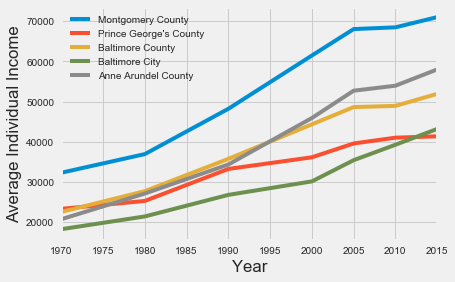

In [68]:
style.use('fivethirtyeight')

#Income of 5 largest counties in Maryland
df_proj[ranked[:5]].plot()
plt.ylabel('Average Individual Income')